# <center> 第一部分pandsa库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import pylab as pl

In [3]:
df_happy = pd.read_csv("https://phys.xmu.edu.cn/sites/default/files/2020-03/2017Happy.csv")
df_happy.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [5]:
df_happy.columns[:]

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [7]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [9]:
df_happy.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


## 经过分析，我们发现共有七个指标与Score相关

#### 分别是、Family、Health、Freedom、Generosity、Trust、Dystopia
我们选取这些指标进行分析

In [14]:
df_happy.columns = ["Country","Happiness.Rank","Happiness.Score","Whisker.high", "Whisker.low","Economy", "Family", "Health","Freedom","Generosity","Trust","Dystopia.Residual"]
Score=[]              
Economy=[]
Family=[]
Health=[]
Freedom=[]
Generosity=[]
Trust=[]
Dystopia=[]
m=0
for i in df_happy['Happiness.Score'] :       
    Score.append(i)
for i in df_happy['Economy'] :
    m=(i-0)/(1.870766-0)                     
    Economy.append(m)
    m=0
for i in df_happy['Family'] :
    m=(i-0)/(1.610574-0)
    Family.append(m)
    m=0
for i in df_happy['Health'] :
    m=(i-0)/(0.949492-0)
    Health.append(m)
    m=0
for i in df_happy['Freedom'] :
    m=(i-0)/(0.658249-0)
    Freedom.append(m)
    m=0
for i in df_happy['Generosity'] :
    m=(i-0)/(0.838075-0)
    Generosity.append(m)
    m=0
for i in df_happy['Trust'] :
    m=(i-0)/(0.464308-0)
    Trust.append(i)
    m=0
for i in df_happy['Dystopia.Residual'] :
    m=(i-0.377914)/(3.117485-0.377914)
    Dystopia.append(i)
    m=0
One=[]    
for i in range(1,156,1):
    m=1
    One.append(m)
total=[]    
total.append(One)
total.append(Economy)
total.append(Family)
total.append(Health)
total.append(Freedom)
total.append(Generosity)
total.append(Trust)
total.append(Dystopia)
total_mat=np.matrix(total)                      
X=np.transpose(total_mat)
a0=[]                                   
for i in range(1,156,1):
    m=0
    a0.append(m)
a1=np.matrix(a0)                
A=np.transpose(a1)
y0=np.matrix(Score)             
Y=np.transpose(y0)     
A=np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(X),X))),np.transpose(X)),Y)  
print(A)
#A的系数对应Economy、Family、Health、Freedom、Generosity、Trust、Dystopia.Residual的系数

[[1.58108282e-04]
 [1.87093119e+00]
 [1.61042039e+00]
 [9.49423285e-01]
 [6.58263594e-01]
 [8.38241376e-01]
 [9.99752561e-01]
 [9.99954478e-01]]


### 分析上面的系数，从上至下出去第一项，分别是Economy、Family、Health、Freedom、Generosity、Trust、Dystopia.Residual的权重系数，最大的三项分别依次对应Economy、Family、Dystopia.Residual，说明他们是影响数据的前三大因素

## 因此得出结论，决定幸福指数的前三大因素分别是Economy、Family、Dystopia.Residual

=========================================================================================================

# <center>第二部分 Logistic Regression

1.导入必要的库



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2.生成训练集

[-0.01, 1.02, -0.01, 1.02]

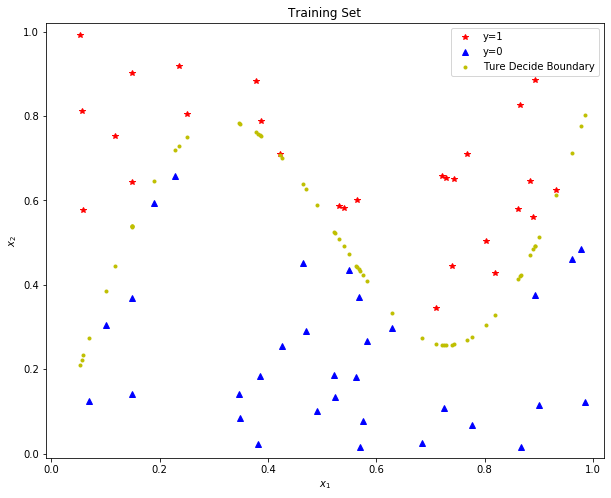

In [3]:
#先定义相关函数

def tureFunction(x):  #边界分类函数
    return x+0.5*np.sin(6*x)

def sigmod(z):  #定义 sigmod 函数
    return 1/(1+np.exp(-z))

def costFunction(X,Theta,Y,m):      #logistic regression的costfunction
    z=np.dot(X,Theta)
    h=sigmod(z)
    H=np.log10(h)
    H1=np.log10(1-h)
    Y1=1-Y
    return  -(np.dot(Y.T,H)+np.dot(Y1.T,H1))/m 

#训练集样本数，取60个做为训练集
m=100
np.random.seed(233)
m_tr=int(m*0.6)

x1=np.random.rand(m_tr,1)
x2=np.random.rand(m_tr,1)

tureBoundary=tureFunction(x1)

#根据预设边界给样本点打上标签
Y_target=np.zeros((m_tr,1))

for i in np.arange(m_tr):
    if x2[i,0] >= tureBoundary[i,0]:
        Y_target[i,0]=1

plt.figure(figsize=(10,8))
plt.plot(x1[np.where(Y_target==1)],x2[np.where(Y_target==1)],"r*",label="y=1")
plt.plot(x1[np.where(Y_target==0)],x2[np.where(Y_target==0)],"b^",label="y=0")

plt.plot(x1,tureBoundary,"y.",label="Ture Decide Boundary")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Training Set")
plt.legend(loc="best")
plt.axis([-0.01,1.02,-0.01,1.02]) #plt.axis([Xmin,Xmax,Ymin,Ymax])

3.特征映射

In [4]:
def FeatureMapping(x1,x2,n):
    '''
    定义幂函数特征项
    [x1,x2] --训练集的x值的两个分量
    n --表示最高阶幂次
    输出（m,2n+1)的矩阵'''
    
    m_tr=len(x1)
    XX=np.ones((m_tr,1))
    
    for i in np.arange(1,n+1):
        for j in np.arange(i+1):
            g=np.power(x1,i-j)*np.power(x2,j)
            XX=np.column_stack((XX,g))
    return XX

n=30

X=FeatureMapping(x1,x2,n)

#给定最高次幂n, 计算特征数
k=0
for i in np.arange(n+2):
    k=i+k

print("最高次幂：",n,"\n特征数：",k)

最高次幂： 30 
特征数： 496


4.训练

/Users/linyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


Final J value 0.1113582463212263


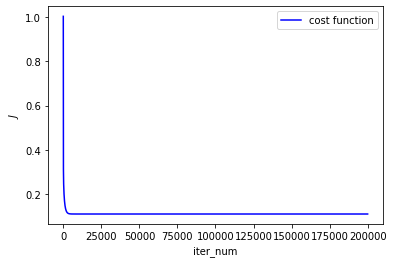

In [5]:
#设定一个Theta的随机初值
Theta=np.random.rand(k).reshape(k,1)

iter=200000 #梯度下降的迭代次数
alpha=0.18 #学习率
lamda=0.2 #正则化系数

#准备储存每步迭代的lost function值
J_history=np.zeros((iter,1))

for i in np.arange(iter):
    z=np.dot(X,Theta)
    h=sigmod(z)
    Theta1= np.copy(Theta) #用于计算正则化的权重，注意要去掉第一项权重Theta0
    Theta1[0,0]=0 #去掉第一个权重
    Theta=Theta-alpha/m_tr*(np.dot(X.T,h-Y_target)+lamda*Theta1)
    J_history[i,0]=costFunction(X,Theta,Y_target,m_tr)+lamda/2/m*np.dot(Theta1.T,Theta1)

plt.plot(J_history[:,0],"b-",label="cost function")
plt.xlabel("iter_num")
plt.ylabel("$J$")
plt.legend(loc="best")
print("Final J value",J_history[-1,0])
    
#将训练得到的权重和预测的分类储存下来
Theta_prediction=Theta
Y_prediction=sigmod(np.dot(FeatureMapping(x1,x2,n),Theta_prediction))

5.画预测的分类边界（z=0的等高线）

/Users/linyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'Prediction vs Boundary')

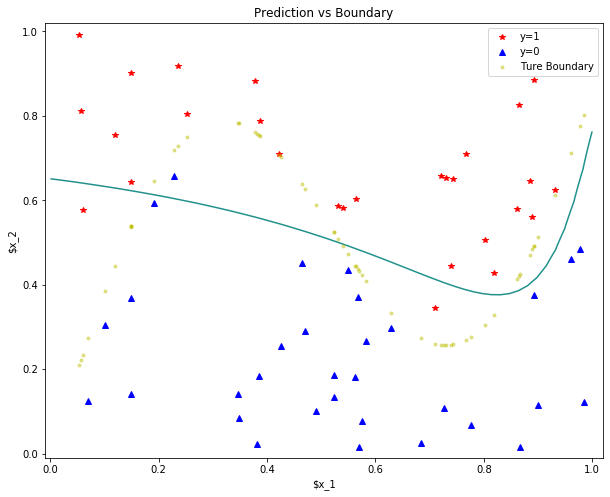

In [6]:
'''
决策边界，不是训练集的属性，
而是假设本身及参数的属性，
其中参数由训练集拟合。
下面计算分类边界时的‘z’
其中featuremapping反映的是我们的‘假设’，
而Theta_prediction则是反映参数  '''




#定义网格点的Featuremapping
def FeatureMappingS(x1,x2,n):
    '''
    对x1--x2 平面网格点的单点Feature Mapping
    定义函数最高阶次幂
    x1,x2训练集的x值的两个分量
    n-表示最高次幂
    输出：(1,2*n+1)的矩阵'''
    XX=np.ones((1,1))
    
    for i in np.arange(1,n+1):
        for j in np.arange(i+1):
            g=np.power(x1,i-j)*np.power(x2,j)
            XX=np.column_stack((XX,g))
    return XX

u=np.linspace(0,1,60)
v=np.linspace(0,1,60)
z=np.zeros((60,60))
for i in np.arange(60):
    for j in np.arange(60):
        z[i,j]=np.dot(FeatureMappingS(u[i],v[j],n),Theta_prediction)
        
        
Z=z.T
plt.figure(figsize=(10,8))

#画分类边界 Z=0
plt.contour(u,v,Z,0,label="Prediction Boundary")

#画样本点
plt.plot(x1[np.where(Y_target==1)],x2[np.where(Y_target==1)],"r*",label="y=1")
plt.plot(x1[np.where(Y_target==0)],x2[np.where(Y_target==0)],"b^",label="y=0")

#画真实的分类边界
plt.plot(x1,tureBoundary,'y.',alpha=0.4,label="Ture Boundary")
plt.xlabel('$x_1')
plt.ylabel('$x_2')
plt.axis([-0.01,1.02,-0.01,1.02])
plt.legend(loc='best')
plt.title("Prediction vs Boundary")

6.交叉验证

/Users/linyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 1.0, 'CV Set')

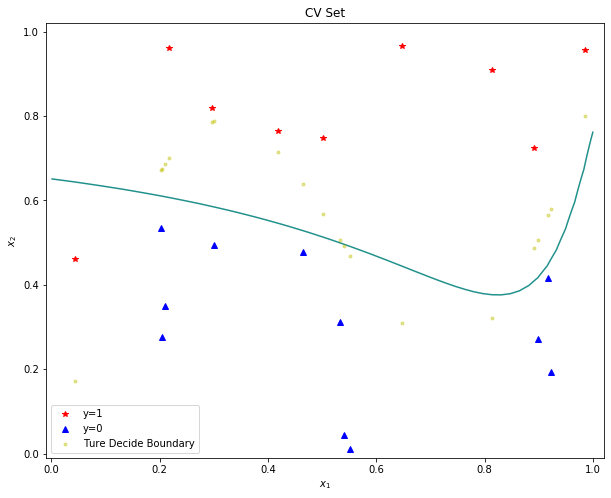

In [14]:
#验证集样本数
m_cv=np.int(0.2*m)

#生成验证集，取20个做验证

x1_cv=np.random.rand(m_cv,1)
x2_cv=np.random.rand(m_cv,1)

tureBoundary_cv=tureFunction(x1_cv)

Y_cv=np.zeros((m_cv,1))

for i in np.arange(m_cv):
    if x2_cv[i,0]>=tureBoundary_cv[i,0]:
        Y_cv[i,0]=1
        
#画验证集的样本点
plt.figure(figsize=(10,8))
plt.plot(x1_cv[np.where(Y_cv==1)],x2_cv[np.where(Y_cv==1)],"r*",label="y=1")
plt.plot(x1_cv[np.where(Y_cv==0)],x2_cv[np.where(Y_cv==0)],"b^",label="y=0")

#画分类边界 Z=0
plt.contour(u,v,Z,0,label="Prediction Boundary")

#画真实的分类边界
plt.plot(x1_cv,tureBoundary_cv,'y.',alpha=0.4,label="Ture Decide Boundary")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-0.01,1.02,-0.01,1.02])
plt.legend(loc='best')
plt.title("CV Set")

7.用 F1-score评估超参数，特别是最高次幂n

In [15]:
#评价矩阵Matrix 
#tp真阳，tn真阴，fp假阳，fn真阴
Y_prediction_cv=sigmod(np.dot(FeatureMapping(x1_cv,x2_cv,n),Theta_prediction))

tp=len(np.where((Y_prediction_cv>=0.5)&(Y_cv==1))[0])
tn=len(np.where((Y_prediction_cv<0.5)&(Y_cv==0))[0])
fp=len(np.where((Y_prediction_cv>=0.5)&(Y_cv==0))[0])
fn=len(np.where((Y_prediction_cv<0.5)&(Y_cv==1))[0])

#计算各类指标及F1-score
Accuracy=(tp+tn)/m_cv
Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
F1_score=2/(1/Recall+1/Precision)

print("n:",n)
print("CV Accuracy",Accuracy)
print("CV Precision:",Precision)
print("CV Recall:",Recall)
print("CV F1_score:",F1_score)



n: 30
CV Accuracy 0.95
CV Precision: 1.0
CV Recall: 0.8888888888888888
CV F1_score: 0.9411764705882353


8.测试集上用 F1-score 评估最终模型的推广能力

In [16]:
#测试样本数，20个测试样本
m_test=np.int(0.2*m)

#生成验证集
x1_test=np.random.rand(m_test,1)
x2_test=np.random.rand(m_test,1)

tureBoundary_test=tureFunction(x1_test)

Y_test=np.zeros((m_test,1))

for i in np.arange(m_test):
    if x2_test[i,0]>=tureBoundary_test[i,0]:
        Y_test[i,0]=1

#评价矩阵Matrix 
#tp真阳，tn真阴，fp假阳，fn真阴

Y_prediction_test=sigmod(np.dot(FeatureMapping(x1_test,x2_test,n),Theta_prediction))

tp=len(np.where((Y_prediction_test>=0.5)&(Y_test==1))[0])
tn=len(np.where((Y_prediction_test<0.5)&(Y_test==0))[0])
fp=len(np.where((Y_prediction_test>=0.5)&(Y_test==0))[0])
fn=len(np.where((Y_prediction_test<0.5)&(Y_test==1))[0])

#计算各类指标及F1-score
Accuracy=(tp+tn)/m_cv
Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
F1_score=2/(1/Recall+1/Precision)

print("n:",n)
print("Test Accuracy",Accuracy)
print("Test Precision:",Precision)
print("Test Recall:",Recall)
print("Test F1_score:",F1_score)



n: 30
Test Accuracy 0.9
Test Precision: 0.75
Test Recall: 1.0
Test F1_score: 0.8571428571428572


## 通过以上尝试，我们发现，在交叉验证集上该模型的F1-Score达到了0.94，而在测试集上只有0.86的F1-Score，说明模型仍具有改进的空间。